# Importing Libraries

In [773]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import StratifiedKFold



from sklearn.metrics import accuracy_score
%matplotlib inline

# Reading Data from CSV files

In [774]:
test  = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test.shape

(367, 12)

# Combining training and testing data for preprocessing

In [775]:
totalData = train.append(test, ignore_index=True)
train.head(10)

C:\Users\ketan\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Preprocessing and Reducing the noise 

In [776]:
totalData.isnull().sum()
totalData = totalData.drop(["Loan_ID"], axis=1)

In [777]:

totalData['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
totalData['Married'].fillna(train['Married'].mode()[0], inplace=True)
# totalData['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
totalData['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
totalData['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
totalData['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
pd.options.mode.chained_assignment = None
totalData['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

totalData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [778]:
totalData['LoanAmount'] = np.log(totalData['LoanAmount'])
totalData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

# Handling categorical features

In [779]:
LoanStatus = totalData['Loan_Status']
totalData = totalData.drop(["Loan_Status"], axis=1)

# column_names_for_onehot = ['Property_Area','Self_Employed','Education','Married','Gender','Credit_History']
# totalData = pd.get_dummies(totalData, columns=column_names_for_onehot, drop_first=True)
totalData = pd.get_dummies(totalData)
totalData = pd.concat([totalData, LoanStatus], axis=1)

# Feature Engineering

C:\Users\ketan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


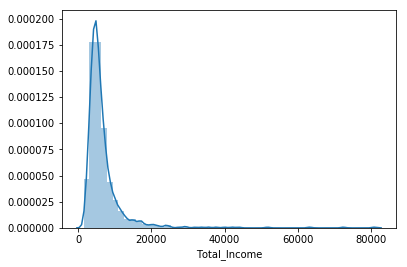

In [780]:
totalData['Total_Income']=totalData['ApplicantIncome']+totalData['CoapplicantIncome']
sns.distplot(totalData['Total_Income']);

C:\Users\ketan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


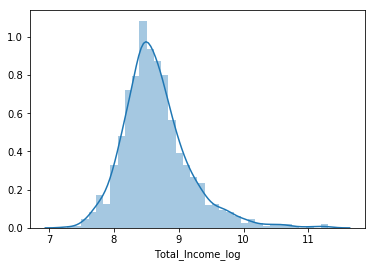

In [781]:
#Taking log to make data normalized
totalData['Total_Income_log'] = np.log(totalData['Total_Income'])
sns.distplot(totalData['Total_Income_log']);

C:\Users\ketan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


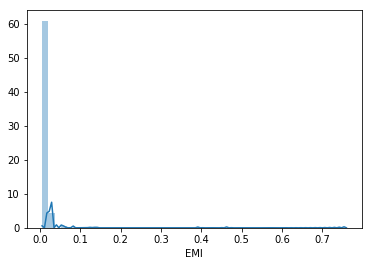

In [782]:
totalData['EMI']=totalData['LoanAmount']/totalData['Loan_Amount_Term']
sns.distplot(totalData['EMI']);

C:\Users\ketan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


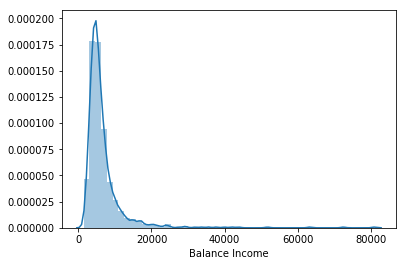

In [783]:
totalData['Balance Income']=totalData['Total_Income']-(totalData['EMI']*1000) # Multiply with 1000 to make the units equal 
sns.distplot(totalData['Balance Income']);

In [784]:
totalData=totalData.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Preparing training and testing data for applying models

In [785]:
# totalData = totalData.drop(["Loan_ID"], axis=1)
totalData.Loan_Status[totalData.Loan_Status == 'Y' ] = 1
totalData.Loan_Status[totalData.Loan_Status == 'N' ] = 0
trainingData = totalData.iloc[:(train.shape[0])]
testingData = totalData.iloc[(train.shape[0]):]

trainingData = trainingData.dropna(axis=0)
y_train = trainingData['Loan_Status']
# x_train = trainingData.iloc[:(train.shape[0])].drop(["Loan_Status_1"], axis=1)
x_train = trainingData.drop(["Loan_Status"], axis=1)
y_train = y_train.astype('int')

x_test = testingData.drop(["Loan_Status"], axis=1)
x_test = x_test.fillna(0)

# Data Visulization function for PCA and SVD

In [786]:
def dataVisulizationFunction(components, method, y_total):
    principleDf = pd.concat([pd.DataFrame(data = components, columns=['Comp1', 'Comp2']), y_total], axis=1)

    #Graph ploting
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Component 1', fontsize=15)
    ax.set_ylabel('Component 2', fontsize=15)
    ax.set_title("Data visulization using 2 components using - {}".format(method), fontsize=20)

    targets = [0, 1]
    colors = ['r', 'b']

    for target, color in zip(targets, colors):
        indicesToKeep = principleDf['Loan_Status'] == target
        ax.scatter(principleDf.loc[indicesToKeep, 'Comp1'], principleDf.loc[indicesToKeep, 'Comp2'], c = color, s = 50)

    ax.legend(targets)
    ax.grid()

# PCA implementation

Variance content of 2 components :[0.17381482 0.13780712]


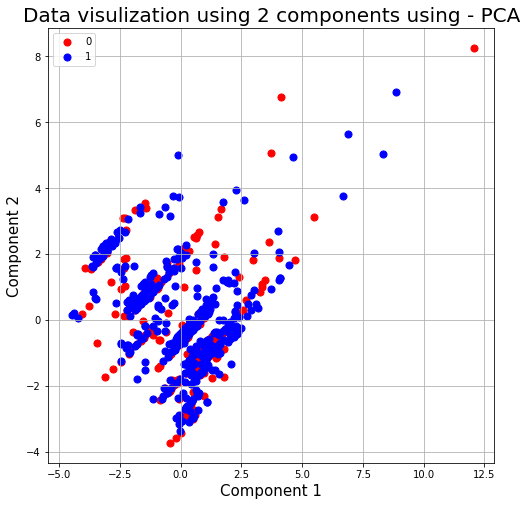

In [787]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scalar = StandardScaler()
scalar.fit(x_train)
x = scalar.transform(x_train)
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(x)
dataVisulizationFunction(pcaComponents,"PCA", y_train)
print("Variance content of 2 components :{}".format(pca.explained_variance_ratio_))

# SVD implementation

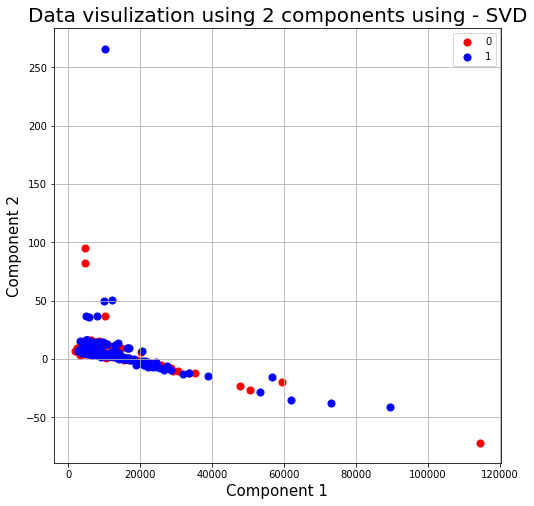

In [788]:
svd = TruncatedSVD(n_components=2)
u = svd.fit_transform(x_train)
s = svd.explained_variance_
vt = svd.components_
dataVisulizationFunction(u, "SVD",y_train)

In [789]:
def modelHelperFunction(x_train, y_train, model):
    i=1
    kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    for train_index,test_index in kf.split(x_train, y_train):
         print('\n{} of kfold {}'.format(i,kf.n_splits))
         xtr,xvl = x_train.loc[train_index],x_train.loc[test_index]
         ytr,yvl = y_train[train_index],y_train[test_index]
         model.fit(xtr, ytr)
         pred_test = model.predict(xvl)
         score = accuracy_score(yvl,pred_test)
         print('accuracy_score',score)
         i+=1
    predictions = model.predict(x_test)
    pred = model.predict_proba(xvl)[:,1]
    return predictions

In [790]:
def csvHelper(predictions, model):
    test["Loan_Status"] = pd.DataFrame(predictions, columns =["Loan_Status"])
    test.Loan_Status[test.Loan_Status == 1 ] = 'Y'
    test.Loan_Status[test.Loan_Status == 0 ] = 'N'
    header = ["Loan_ID", "Loan_Status"]
    test.to_csv(model+'Submission.csv', columns = header,index =False)

# 1. RandomForestClassifier

In [791]:
# all parameters not specified are set to their defaults
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)
predictions = modelHelperFunction(x_train, y_train, rft)
csvHelper(predictions, "RandomForestClassifier")


1 of kfold 5
accuracy_score 0.7661290322580645

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7459016393442623

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8278688524590164


# 2. Neural Network

In [792]:
from sklearn.neural_network import MLPClassifier
nnClassifier = MLPClassifier(solver='adam', learning_rate = 'adaptive',max_iter =500,
                     hidden_layer_sizes=(512,128), random_state=1)

nnClassifier.fit(x_train, y_train)


# Use score method to get accuracy of model
print(("Accuracy of training subset is: {:.3f}").format(nnClassifier.score(x_train, y_train)))

predicted_values = nnClassifier.predict(x_test)
predicted_values

Accuracy of training subset is: 0.313


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 3. Logistic Classifier

In [793]:
lrclf = LogisticRegression()
predictions = modelHelperFunction(x_train, y_train, lrclf)
csvHelper(predictions, "LogisticRegressionClassifier")


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7622950819672131

5 of kfold 5
accuracy_score 0.8278688524590164


# 4. Decision tree classifier

In [794]:
from sklearn.tree import DecisionTreeClassifier
newtree = DecisionTreeClassifier(random_state = 0)
predictions = modelHelperFunction(x_train, y_train, newtree)
csvHelper(predictions, "DecisionTreeClassifier")


1 of kfold 5
accuracy_score 0.7419354838709677

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.6885245901639344

4 of kfold 5
accuracy_score 0.7049180327868853

5 of kfold 5
accuracy_score 0.6885245901639344


# 5. Adaboost Classifier

In [795]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=250)

predictions = modelHelperFunction(x_train, y_train, bdt)
csvHelper(predictions, "AdaBoostClassifier")


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7950819672131147

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


# 6. GradientBoostingClassifier

In [796]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
predictions = modelHelperFunction(x_train, y_train, gbclf)
csvHelper(predictions, "GradientBoostingClassifier")


1 of kfold 5
accuracy_score 0.7661290322580645

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7459016393442623

4 of kfold 5
accuracy_score 0.8032786885245902

5 of kfold 5
accuracy_score 0.8114754098360656


# 7. Naive Bayes Classifier

In [797]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
predictions = modelHelperFunction(x_train, y_train, nbclf)
csvHelper(predictions, "NaiveBayesClassifier")


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8360655737704918


# 8. VotingClassifier

In [798]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', lrclf), ('rf', rft), ('gnb', nbclf),('gbclf',gbclf),('bdt',bdt),('newtree',newtree)], voting='hard')
eclf.fit(x_train, y_train)
prediction = eclf.predict(x_test)
print(("Accuracy of training subset is: {:.3f}").format(eclf.score(x_train, y_train)))
csvHelper(prediction, "VotingClassifier")


Accuracy of training subset is: 0.850


# 9. voting classifier with GridSearchCV

In [799]:
from sklearn.model_selection import GridSearchCV
eclf = VotingClassifier(estimators=[('lr', lrclf), ('rf', rft), ('gnb', nbclf),('gbclf',gbclf),('bdt',bdt),('newtree',newtree)], voting='hard')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(x_train, y_train)
print(("Accuracy of training subset is: {:.3f}").format(grid.score(x_train, y_train)))
prediction = grid.predict(x_test)
csvHelper(prediction, "GridVotingClassifier")

Accuracy of training subset is: 0.850


# 10.XGBoost

In [800]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, max_depth=4)
prediction = modelHelperFunction(x_train, y_train, xgb)
csvHelper(prediction, "XGBClassifier")


1 of kfold 5
accuracy_score 0.7741935483870968

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7459016393442623

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.8278688524590164
